In [76]:
import pandas as pd
import numpy as ny
import os
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir("C:\\Users\\DELL\\Downloads")

In [3]:
sp = pd.read_csv('Students_Performance.csv')
sp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [77]:
#Find out how many males and females participated in the test.

gender_counts = sp['gender'].value_counts()
print(gender_counts)

female    518
male      482
Name: gender, dtype: int64


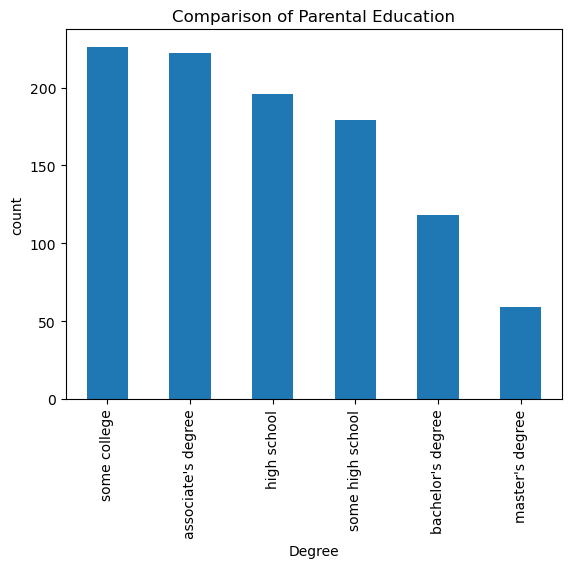

In [78]:
# What do you think about the students' parental level of education?

sp['parental level of education'].value_counts(normalize = True)
sp['parental level of education'].value_counts(dropna = False).plot.bar()
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()


In [79]:
sp['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [80]:
# Who scores the most on average for math, reading and writing based on
#i. Gender
gender = sp.groupby('gender')[['math score','reading score','writing score']].mean()
gender

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [81]:
# # Who scores the most on average for math, reading and writing based on
# ii.Test preparation course

test_prep_scores = sp.groupby('test preparation course')[['math score','reading score','writing score']].mean()
test_prep_scores

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


In [82]:
# What do you think about the scoring variation for math, reading and writing based on
# i.Gender
gender_var = sp.groupby('gender')[['math score','reading score','writing score']].var()
gender_var

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


In [83]:
# What do you think about the scoring variation for math, reading and writing based on
# ii.Test preparation course
test_prep_var = sp.groupby('test preparation course')[['math score','reading score','writing score']].var()
test_prep_var

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


In [84]:
#The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.

# Top 25% math score threshold
top_25_threshold = sp['math score'].quantile(0.75)

# New column 'bonus points' based on math score
sp['bonus points'] = 'False'
sp.loc[sp['math score'] >= top_25_threshold, 'bonus points'] = 'True'
sp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,bonus points
0,female,group C,some high school,free/reduced,none,0,17,10,False
1,female,group B,high school,free/reduced,none,8,24,23,False
2,female,group B,some high school,free/reduced,none,18,32,28,False
3,female,group B,some college,standard,none,11,38,32,False
4,female,group C,some college,free/reduced,none,22,39,33,False
...,...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81,True
996,male,group A,some college,standard,completed,100,96,86,True
997,male,group D,some college,standard,completed,100,97,99,True
998,male,group E,associate's degree,free/reduced,completed,100,100,93,True


In [85]:
true = sp['bonus points'].value_counts()
true

False    745
True     255
Name: bonus points, dtype: int64

In [86]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api

In [87]:
df = pd.read_csv('sales_add.csv')

In [88]:
#The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

alpha = 0.05
t_value,p_value = stats.ttest_ind(df['Sales_before_digital_add(in $)'], df['Sales_After_digital_add(in $)'])
if p_value < alpha:
    print('Reject null hypothesis: There is a significant increase in sales after stepping into digital marketing')
else:
    print('Keep Null hypothesis : There is no significant difference in sales after stepping into digital marketing')

Reject null hypothesis: There is a significant increase in sales after stepping into digital marketing


In [89]:
#The company needs to check whether there is any dependency between the features “Region” and “Manager”

import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Region'], df['Manager'])

#chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Check p-value to determine significance
if p < 0.05:
    print("There is a significant dependency between Region and Manager.")
else:
    print("There is no significant dependency between Region and Manager.")

There is no significant dependency between Region and Manager.
